In [6]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import simplejson as json

In [8]:
f =open("reviews_Grocery_and_Gourmet_Food.json",mode='r')
L = f.readlines()

In [10]:
review_list = []
rating = []
reviewer_id = []
product_id = []
for l in L:
    jj = json.loads(l)
    if (len(jj['reviewText'].split(" "))>12):
        review_list += [jj['reviewText']]
        rating += [jj['overall']]
        reviewer_id += [jj['reviewerID']]
        product_id += [jj['asin']]

In [19]:
d={}
d['TEXT'] = review_list
d['RATING'] = rating
d['reviewerID'] = reviewer_id
d['product_id'] = product_id

revdf = pd.DataFrame(d)

In [75]:
revdf[revdf['product_id'] == 'B000BDHBWQ'].TEXT.values

array([ 'I love sparkling drinks, and I wanted to try new.. something different, and this drink rocks.. It is little bit pricey for my budget, but overall, great drink.  I strongly recommend to those who likes sparkling healthy drinks.  Definitely WINNER!  I hope they will come out with new flavor next time.',
       'I had the Minneola tangerine flavor and oh man! What great taste. This is 100% juice and a little fizz and GREAT tangerine flavor. Its just like biting into a real tangerine... amazing. The wife adds some nice champagne and we have ourselves a great mamosa. Check it!',
       "Essn drinks are awesome. The tangerine flavor is very good. These are somewhat sweet sparkling drinks. Not sweet like Fanta. And not as intense or sour as Sanpelligrino's Aranciata.I do prefer the Blood Orange / Cranberry mix a bit better. There's more flavor to that drink. This one is still excellent.",
       "This juice product tastes like cheap orange juice, but costs a small fortune. Not worth 

In [64]:
gg = revdf.groupby('RATING')

In [68]:
gg.count()['TEXT'].index

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name=u'RATING')

In [69]:
gg.count()['TEXT'].values

array([101349,  61881,  95981, 175834, 845991])

In [70]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [72]:
import seaborn as sns

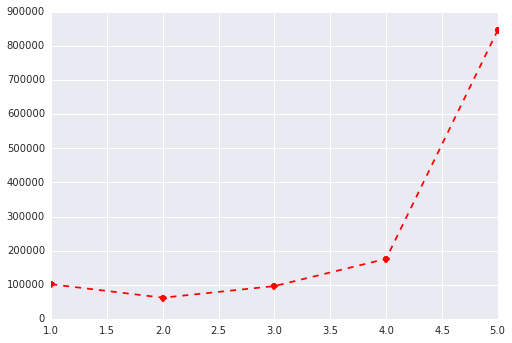

In [75]:
pylab.plot(gg.count()['TEXT'].index,gg.count()['TEXT'].values,'--ro')

In [77]:
gg_rev_id = revdf.groupby('reviewerID')

[]

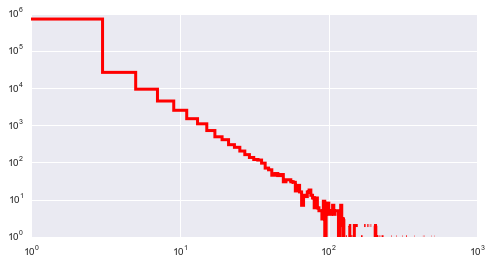

In [143]:
pylab.hist(gg_rev_id.count()['RATING'].values,histtype='step',bins=255,color='r',linewidth=3)
pylab.loglog()

In [105]:
#sns.set(rc={"figure.figsize": (8, 4)})
#ax = sns.distplot(gg_rev_id.count()['RATING'].values,bins=20,\
#                hist_kws={"histtype": "step", "linewidth": 3,\
#                             "alpha": 1})


In [132]:
gg_products_id = revdf.groupby(['product_id'])

In [165]:
one_review_text_list = pd.merge(pd.DataFrame(gg_products_id.count()['RATING'][gg_products_id.count()['RATING']<2])\
         .reset_index(),revdf,on='product_id',how='inner').TEXT.values

In [174]:
len(one_review_text_list)

66743

In [188]:
pp = [x for x in one_review_text_list if len(x.split(" "))<20]

In [190]:
len(pp)

1508

In [192]:
pp[10]

'too small to work in an air popper.  Who uses the stove anymore!!!'

In [187]:
len(one_review_text_list[0].split(" "))

88

In [ ]:
gg_products_id.count()['RATING']

In [8]:
revdf[revdf['RATING']>3].count()

RATING    1021825
TEXT      1021825
dtype: int64

In [9]:
revdf[revdf['RATING']<3].count()

RATING    163230
TEXT      163230
dtype: int64

In [11]:
bad_rev=revdf[revdf['RATING']<3].ix[0:100000]
bad_rev['target']=0

In [12]:
good_rev=revdf[revdf['RATING']>3].ix[0:100000]
good_rev['target']=1

In [13]:
good_rev.append(bad_rev).to_csv('Train_rev.csv',index=None)

In [14]:
bad_rev.TEXT.irow(79)

u"I ordered 3 types of Power Bar.  None of them tastes fresh.  The expiration date isn't until September (it's June now) but I think these bars are stale.  I won't be reordering."

In [15]:
bad_rev.TEXT.irow(879)

u'This brand is disgusting. It is watery and too sweet. If you like the Tazo brand of chai latte you will HATE this brand. I returned it.'